## Clustering

    1. Write down the expectation maximization (EM) steps for a simple 1D eample with two gaussians as shown in the lecture.

1. Start with random seeds
2. Calculate Expectation
3. Calculate new gaussians
4. Repeat untill convergence


In [204]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sn
import scipy
import random

In [205]:
# In the following we will define two functions which we will use for points (a) and (b).

# Hier we define a normal distribution with mean m and standard deviation sigma. 

def Gauss(x, m=0, sigma=1):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - m)**2 / (2 * sigma**2) )

# This function returns the expectations or responsabilities for each cluster in a list [w1, w2].

def Expectation(x, m1, m2, sigma1, sigma2, prior1, prior2):
    if abs(prior1 + prior2 - 1) < 1e-5:
        a1 = Gauss(x, m1, sigma1)*prior1
        a2 = Gauss(x, m2, sigma2)*prior2
        s = a1 + a2
        
        w1 = a1/s
        w2 = a2/s
        
        return [w1, w2]
        
    else:
        print('Error: prior1 and prior2 must add to 1.')
        

(a) Draw a few samples from two gaussians of your choice.

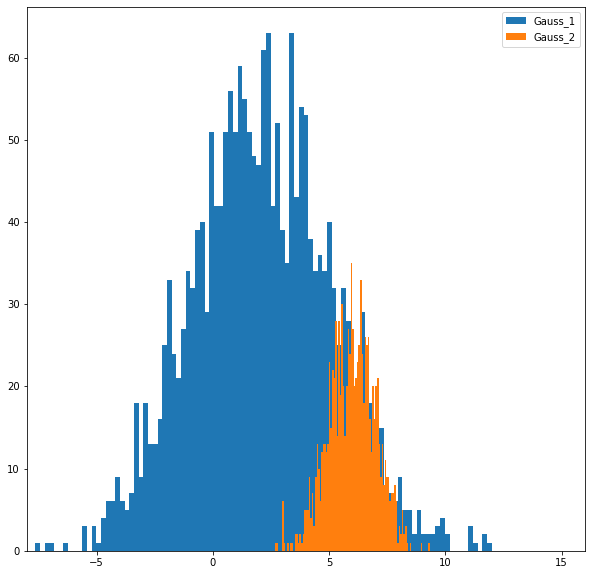

In [206]:
# We will now create two samples that are normal distributed.

N_samples_1 = 2000
N_samples_2 = 1000
bins = 100

m1 = 2
m2 = 6

sigma1 = 3
sigma2 = 1

Gauss_1 =  np.random.normal(m1, sigma1, N_samples_1)
Gauss_2 =  np.random.normal(m2, sigma2, N_samples_2)

Data_x = np.concatenate((Gauss_1, Gauss_2))

# We will now plot the data.

fig = plt.figure(figsize = (10,10))
plt.hist(Gauss_1, bins=bins, label='Gauss_1')
plt.hist(Gauss_2, bins=bins, label='Gauss_2')


plt.xlim([min(m1, m2) - 10, max(m1, m2) + 10])
plt.legend()
plt.show()

(b) What is the expectation of each point belonging to either of the two given gaussians?

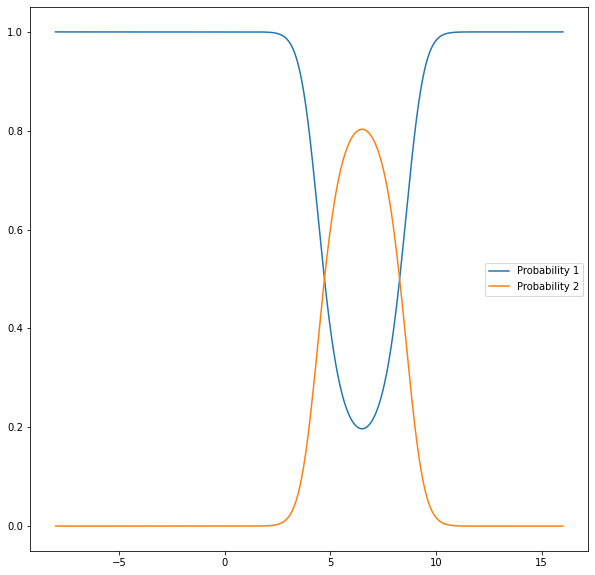

In [207]:
# Hier, we plot the probability of each point belonging to either of the two given gaussians

prior1 = N_samples_1/(N_samples_1 + N_samples_2)
prior2 = 1 - prior1

x = np.linspace(min(m1, m2) - 10, max(m1, m2) + 10, 1000)


Expectation_vectorized_1 = np.zeros(len(x))
for i in range(len(x)):
    Expectation_vectorized_1[i] = Expectation(x[i], m1, m2, sigma1, sigma2, prior1, prior2)[0]
    
Expectation_vectorized_2 = 1 - Expectation_vectorized_1

fig = plt.figure(figsize = (10,10))
plt.plot(x, Expectation_vectorized_1, label='Probability 1')
plt.plot(x, Expectation_vectorized_2, label='Probability 2')
plt.legend()

(c) Given the expectations, what is the optimal choice for two gaussians?

m1_new = 2.0679387064868284
m2_new = 5.997419489356897
sigma1_new = 2.9495455168763938
sigma2_new = 0.9991118757891159
prior1_new = 0.6637735904971481
prior2_new = 0.33622640950285065


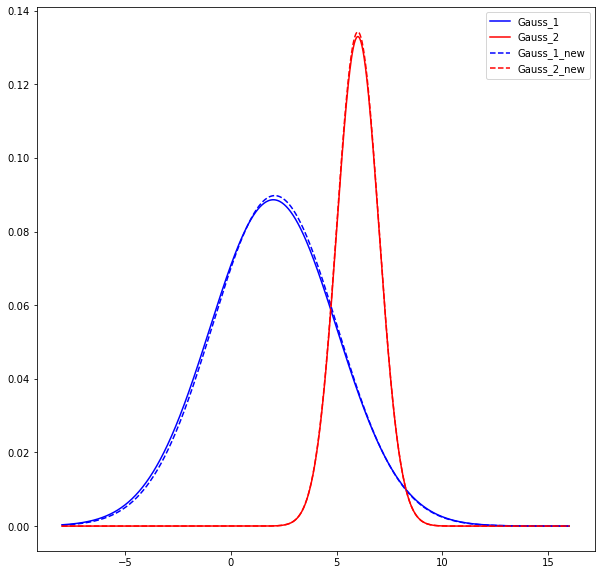

In [208]:
Gauss_vectorized_1 = np.zeros(len(x))
for i in range(len(x)):
    Gauss_vectorized_1[i] = prior1*Gauss(x[i], m1, sigma1)

y1 = Gauss_vectorized_1
    
Gauss_vectorized_2 = np.zeros(len(x))
for i in range(len(x)):
    Gauss_vectorized_2[i] = prior2*Gauss(x[i], m2, sigma2)
    
y2 = Gauss_vectorized_2

s11 = 0
s12 = 0

for i in range(len(Data_x)):
    s11 += Data_x[i]*Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[0]
    s12 += Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[0]
    
m1_new = s11/s12

s21 = 0
s22 = 0

for i in range(len(Data_x)):
    s21 += Data_x[i]*Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[1]
    s22 += Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[1]
    
m2_new = s21/s22


s11 = 0
s12 = 0

for i in range(len(Data_x)):
    s11 += (Data_x[i] - m1_new)**2*Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[0]
    s12 += Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[0]
    
sigma1_new = m.sqrt(s11/s12)
prior1_new = s12/len(Data_x)

s21 = 0
s22 = 0

for i in range(len(Data_x)):
    s21 += (Data_x[i] - m2_new)**2*Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[1]
    s22 += Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[1]
    
sigma2_new = m.sqrt(s21/s22)
prior2_new = s22/len(Data_x)


x = np.linspace(min(m1, m2) - 10, max(m1, m2) + 10, 1000)

Gauss_vectorized_1_new = np.zeros(len(x))
for i in range(len(x)):
    Gauss_vectorized_1_new[i] = prior1_new*Gauss(x[i], m1_new, sigma1_new)

y1_new = Gauss_vectorized_1_new
    
Gauss_vectorized_2_new = np.zeros(len(x))
for i in range(len(x)):
    Gauss_vectorized_2_new[i] = prior2_new*Gauss(x[i], m2_new, sigma2_new)
    
y2_new = Gauss_vectorized_2_new
    


    
fig = plt.figure(figsize = (10,10))
plt.plot(x, y1, label='Gauss_1', color='b')
plt.plot(x, y2, label='Gauss_2', color='r')
plt.plot(x, y1_new, linestyle='dashed', label='Gauss_1_new', color='b')
plt.plot(x, y2_new, linestyle='dashed', label='Gauss_2_new', color='r')
plt.legend()

m1_new = 'm1_new = ' + str(m1_new)
print(m1_new)
m2_new = 'm2_new = ' + str(m2_new)
print(m2_new)
sigma1_new = 'sigma1_new = ' + str(sigma1_new)
print(sigma1_new)
sigma2_new = 'sigma2_new = ' + str(sigma2_new)
print(sigma2_new)
prior1_new = 'prior1_new = ' + str(prior1_new)
print(prior1_new)
prior2_new = 'prior2_new = ' + str(prior2_new)
print(prior2_new)

(d) Starting with two randomly assigned gaussians, can you successfully run the EM steps repeatedly and converge close to your truth?

In [209]:
#We define a function that applies the EM algorithm. Data_x is a list of the data and our algorithm
#finishes, when the new mean mi_new and the old mean mi satisfy abs(mi - mi_new) < eps (for i = 1, 2)

def EM(Data_x, eps):
    m1_new = 10*random.choice((-1, 1))*np.random.rand()
    sigma1_new = 10*np.random.rand()
    m2_new = 10*random.choice((-1, 1))*np.random.rand()
    sigma2_new = 10*np.random.rand()
    prior1_new = 0.8*np.random.rand() + 0.1 
    # We limit the possible random values for the priors to be in (0.1, 0.9) to avoid that the 
    # function gives us one tiny cluster and one very large one.
    prior2_new = 1 - prior1_new
    
    initial_priors = prior1_new, prior2_new
    
    m1 = m1_new + 1
    m2 = m2_new + 1
    
    iterations = 0
    convergence = 0
    
    while abs(m1 - m1_new) > eps or abs(m2 - m2_new) > eps or convergence <= 5:
        iterations += 1
        
        m1 = m1_new
        m2 = m2_new
        sigma1 = sigma1_new
        sigma2 = sigma2_new
        prior1 = prior1_new
        prior2 = 1 - prior1_new
        
        s11 = 0
        s12 = 0

        for i in range(len(Data_x)):
            s11 += Data_x[i]*Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[0]
            s12 += Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[0]
    
        m1_new = s11/s12

        s21 = 0
        s22 = 0

        for i in range(len(Data_x)):
            s21 += Data_x[i]*Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[1]
            s22 += Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[1]
    
        m2_new = s21/s22


        s11 = 0
        s12 = 0

        for i in range(len(Data_x)):
            s11 += (Data_x[i] - m1_new)**2*Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[0]
            s12 += Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[0]
    
        sigma1_new = m.sqrt(s11/s12)
        prior1_new = s12/len(Data_x)

        s21 = 0
        s22 = 0

        for i in range(len(Data_x)):
            s21 += (Data_x[i] - m2_new)**2*Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[1]
            s22 += Expectation(Data_x[i], m1, m2, sigma1, sigma2, prior1, prior2)[1]
    
        sigma2_new = m.sqrt(s21/s22)
        prior2_new = s22/len(Data_x)
        
        if abs(m1 - m1_new) <= eps and abs(m2 - m2_new) <= eps:
            convergence += 1
        
    return [m1_new, m2_new, sigma1_new, sigma2_new, prior1_new, prior2_new, iterations, initial_priors]
  
# If the function is giving different answers, maybe one needs to reduce eps.    
    

In [210]:
EM(Data_x, 1e-3)

[6.004347074750358,
 2.0748942057790747,
 0.9958476128232776,
 2.948934487365319,
 0.3344587043963359,
 0.665541295603664,
 93,
 (0.12651795200346144, 0.8734820479965386)]

In [211]:
EM(Data_x, 1e-3)

[6.004256509052327,
 2.0745954235138604,
 0.9959799966779971,
 2.9488577264343236,
 0.3345170153847224,
 0.6654829846152774,
 71,
 (0.5192757112094798, 0.4807242887905202)]